## Assignment A2b: Photon Detection

### John Mays (jkm100)

## 1. Simulating a dim flash of light

In [1]:
# Appropriate Libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
mpl.rcdefaults()

from A2b_code import *

### 1a. Random times

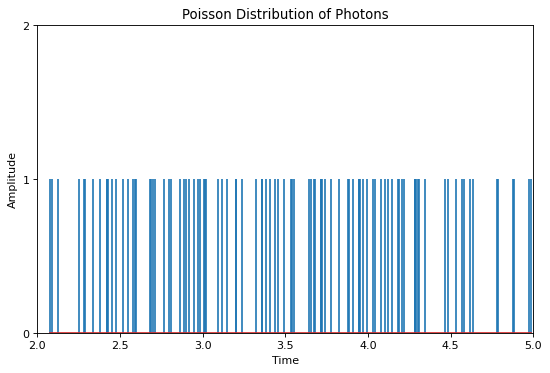

In [2]:
t = randtimes(100, 2, 5)
plotflash(t, 2, 5)

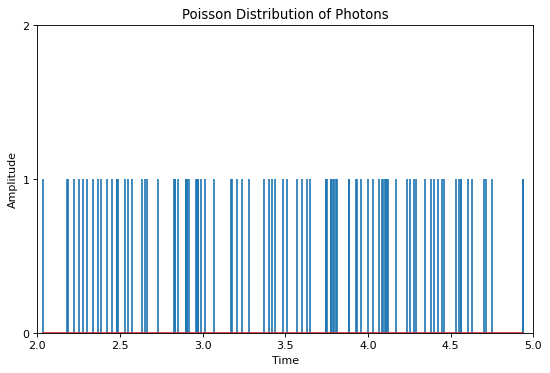

In [3]:
t = randtimes(100, 2, 5)
plotflash(t, 2, 5)

### 1b. Random intervals

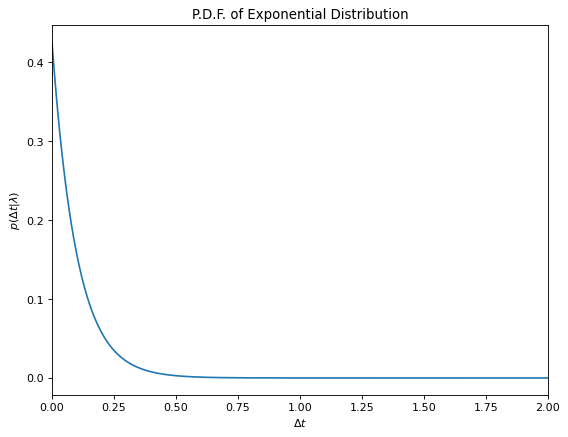

In [4]:
plotpdfexp(lam=10)

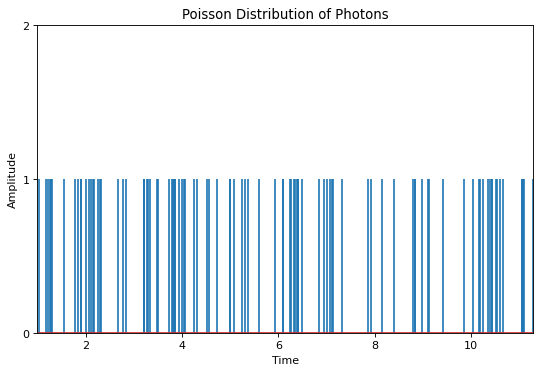

In [5]:
t = randintervals(100, 10, 1)
plotflash(t, 1)

### 1c. Seeing the flash

answer

## 2. Calculating the probability detection

### 2a. The probability of K photons

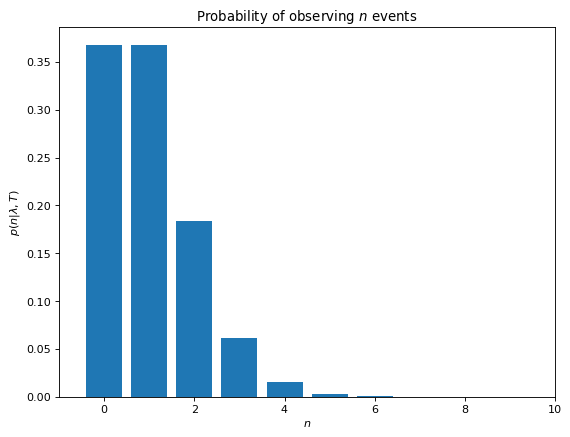

In [6]:
K = np.arange(0, 10)
plotbarpdfphotons(K, lam=10)

At this rate, the subject would most likely not see the flash, as the probabilities of seeing 6, 7, 8, ... photons are close to 0.

##### Doubling the rate:

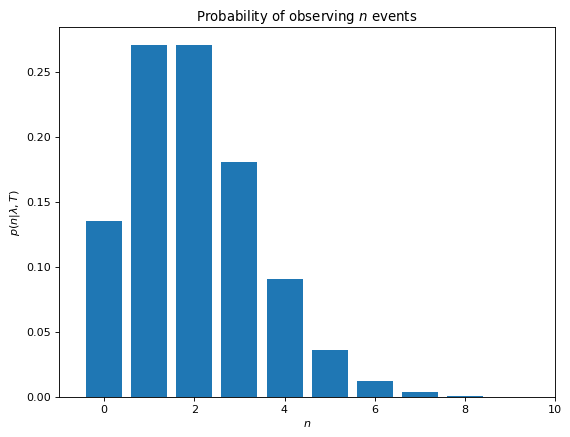

In [7]:
plotbarpdfphotons(K, lam=20)

#### Doubling the rate again:

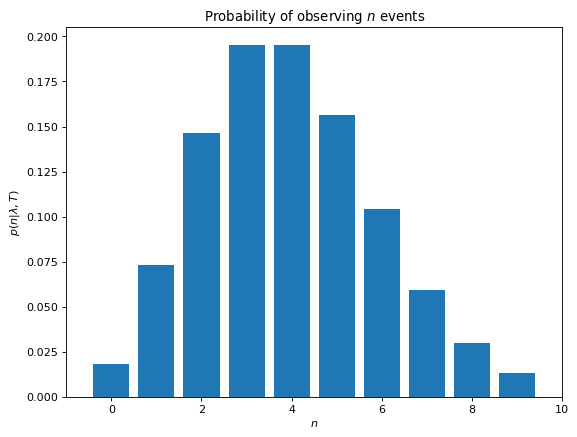

In [8]:
plotbarpdfphotons(K, lam=40)

As the rate goes up, the mean of the distribuition increases, and becomes closer to 6.

### 2b. The probability of K or more photons

In [9]:
detectionprob(6)

0.21486961296959484

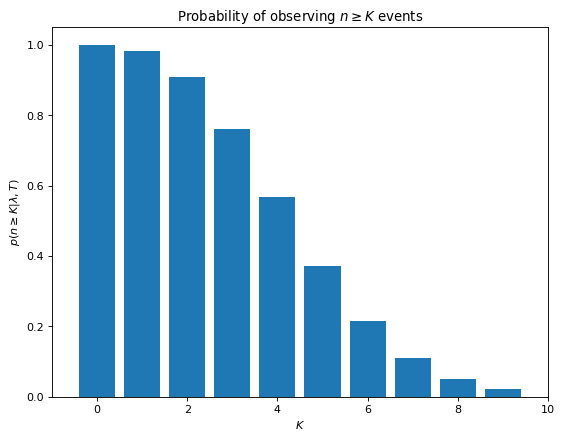

In [10]:
K = np.arange(0, 10)
plotbarcdfphotons(K)

## 3. Estimating the threshold from experimental data

### 3a. Simulating the photon stream

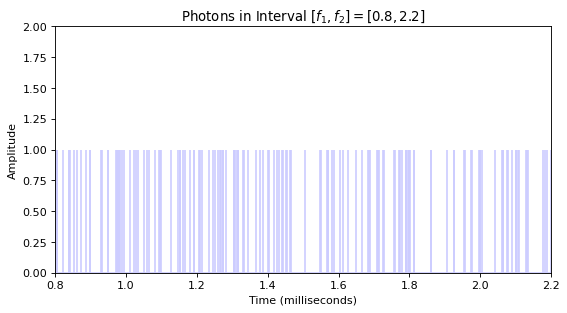

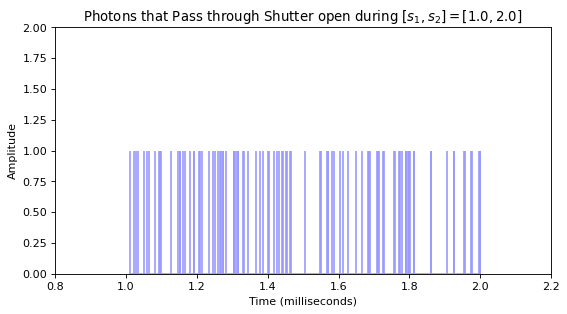

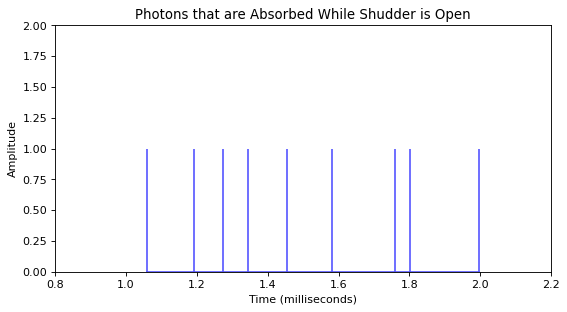

In [11]:
plotHSPsimulation()

### 3b. Probability of seeing

In [12]:
probseeing(I=100)

0.5543203586353891

### 3c. Plotting % detected vs light intensity for different parameters

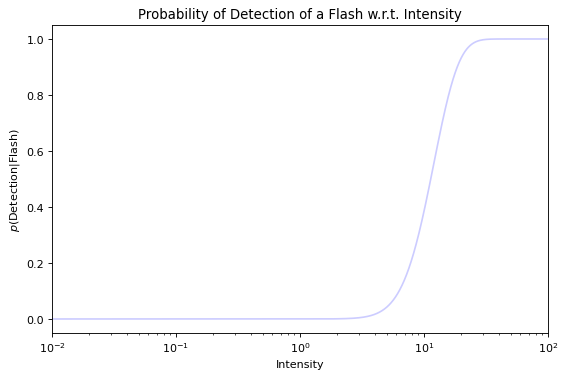

In [13]:
plotdetectioncurve(alpha = 0.5, K=6, seperatecurves=False)

#### Changing only $K$

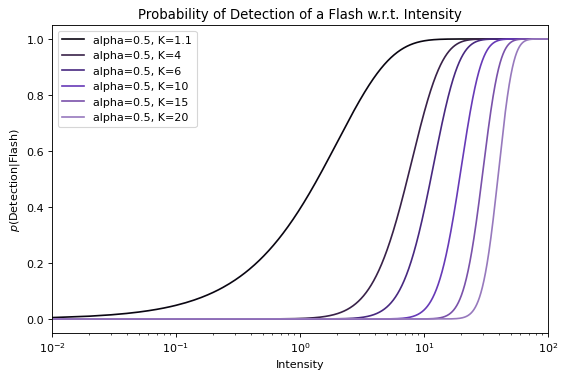

In [14]:
alpha = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
K=[1.1, 4, 6, 10, 15, 20]
plotdetectioncurve(alpha, K, seperatecurves=True)

#### Changing only $\alpha$

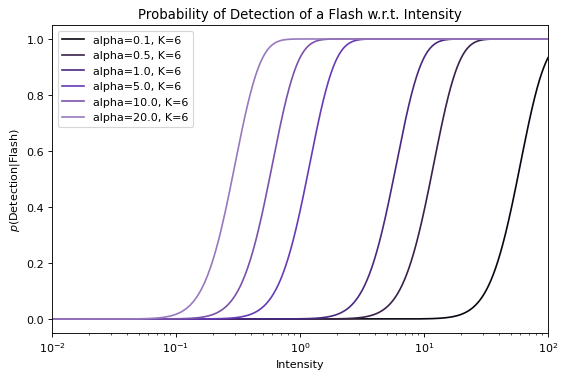

In [15]:
alpha = [0.1, 0.5, 1.0, 5.0, 10.0, 20.0]
K=[6, 6, 6, 6, 6, 6]
plotdetectioncurve(alpha, K, seperatecurves=True)

### 3d. Fitting parameters to experimental data

#### Just the two pairs of data:

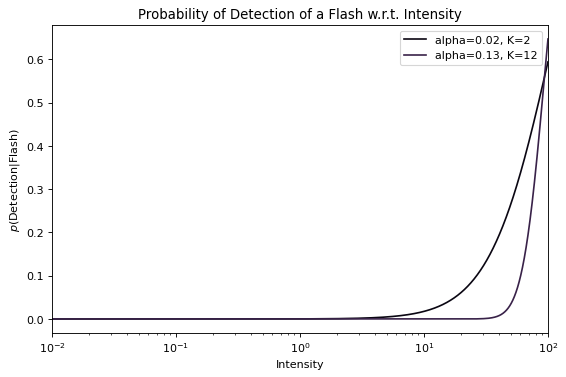

In [16]:
alpha = [0.02, 0.13]
K = [2, 12]
plotdetectioncurve(alpha, K, seperatecurves=True)

#### Original two pairs overlaid on the HSP subject SS's pairs:

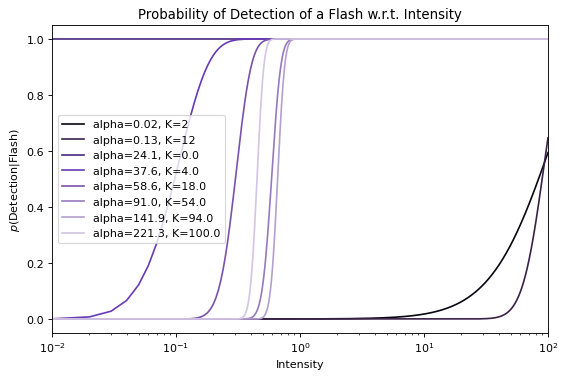

In [17]:
alpha = [0.02, 0.13, 24.1, 37.6, 58.6, 91.0, 141.9, 221.3]
K=[2, 12, 0.0, 4.0, 18.0, 54.0, 94.0, 100.0]
plotdetectioncurve(alpha, K, seperatecurves=True)

For now, I am assuming that $(\alpha=0.02, K=2)$ and $(\alpha=0.13, K=12)$ are to be included in the experimental data.  I am a bit unclear as to whether or not they should be included in order to find the fit, but I did include them here:

#### Approximately Optimal Results: $\alpha = 0.06$ and $K=6$

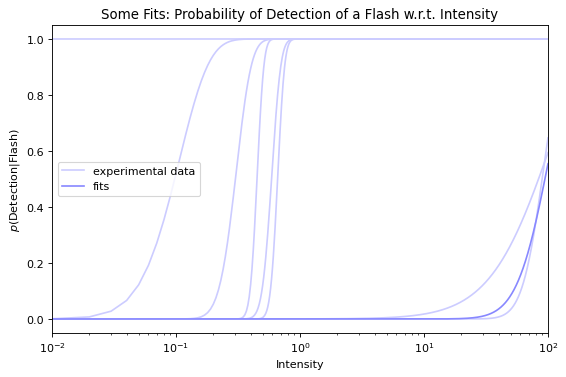

In [18]:
plotfit(alpha=0.06, K=6)

#### Some not-so optimal fits:

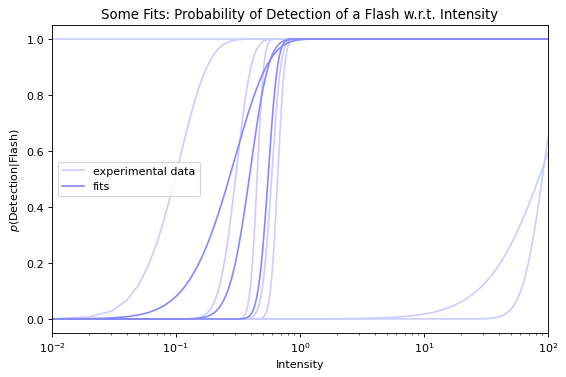

In [19]:
plotfit(alpha=[10, 30, 90], K=[3, 12, 50])
#10, 3
#30, 12
#90, 50


I would explain that, in order to see a dim flash of light, assuming there is a tight mean that can describe the $\alpha$ probability of a photon being absorbed by the human retina $\approx 43\%$, it takes around $20$ photons arriving within a given timespan, usually with a maximum of $100$ ms, in order to be detectable.

In [41]:
def mse2(prob, e_prob):
    prob = np.array(prob)
    e_prob = np.array(e_prob)
    sum = np.linalg.norm(prob-e_prob, ord=2)
    return (1/len(prob))*sum

def findfit2():
    alphas = np.linspace(0.00, 1.00, num=101)
    Ks = np.linspace(1, 100, num=101)
    e_alphas = [0.02, 0.13]
    e_Ks = [2, 12]
    min_total_mse = None
    optimal_alpha = None
    optimal_K = None

    for alpha in alphas:
        for K in Ks:
            total_mse = 0
            prob = []
            for I in np.linspace(10, 100, 91):
                prob.append(probseeing(I, alpha=alpha, K=K))
            for i in range(len(e_alphas)):
                e_prob = []
                for I in np.linspace(10, 100, 91):
                    e_prob.append(probseeing(I, alpha=e_alphas[i], K=e_Ks[i]))
                total_mse += mse2(prob, e_prob)
            if (min_total_mse == None) or \
            (total_mse < min_total_mse):
                min_total_mse = total_mse
                optimal_alpha = alpha
                optimal_K = K
    return optimal_alpha, optimal_K